## HW3: Decision Tree, Random Forest, and Adaboost
In hw3, you need to implement decision tree, random forest and adaboost by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.tree.DecisionTreeClassifier

In [1]:
# !pip install sklearn

## Load data

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()
feature_names = data['feature_names']
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

In [5]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.0000,0.00000,0.2475,0.06969
1,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.1622,0.07393,0.2781,0.08052
2,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.38410,0.5754,0.18720,0.3258,0.09720
3,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,...,22.32,25.73,148.20,1538.0,0.1021,0.22640,0.3207,0.12180,0.2841,0.06541
4,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.3508,0.19390,0.2928,0.07867


In [6]:
x_train.shape

(426, 30)

In [7]:
y_train.shape

(426, 1)

In [8]:
x_test.shape

(143, 30)

In [9]:
y_test.shape

(143, 1)

## Question 1
Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from the course sludes on E3

In [12]:
import math
import collections

Gini impurity: https://kknews.cc/zh-tw/code/443je5v.html

In [13]:
def gini(sequence):
    g = 0
    count = np.bincount(sequence)
    count_arr = count[np.nonzero(count)]
    n = count_arr.sum()
    for i in count_arr:
        g = g + (i/n)**2
    gini = 1.0 - g
    return gini


def entropy(sequence):
    e = 0
    count = np.bincount(sequence)
    count_arr = count[np.nonzero(count)]
    n = count_arr.sum()
    for i in count_arr:
        e = e - (i/n)*math.log2(i/n)
    return e

In [14]:
# 1 = class 1,
# 2 = class 2
data = np.array([1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2])

In [15]:
print("Gini of data is ", gini(data))

Gini of data is  0.4628099173553719


In [16]:
print("Entropy of data is ", entropy(data))

Entropy of data is  0.9456603046006402


In [17]:
# Test gini & entrophy function by myself
data2 = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
print("Gini of data is ", gini(data2))
print("Entropy of data is ", entropy(data2))

# I think the outcome is correct

Gini of data is  0.5
Entropy of data is  1.0


In [18]:
# Test gini & entrophy function by myself
data2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print("Gini of data is ", gini(data2))
print("Entropy of data is ", entropy(data2))

# I think the outcome is correct

Gini of data is  0.0
Entropy of data is  0.0


## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the test data. You should implement two arguments for the Decision Tree algorithm
1. **Criterion**: The function to measure the quality of a split. Your model should support “gini” for the Gini impurity and “entropy” for the information gain. 
2. **Max_depth**: The maximum depth of the tree. If Max_depth=None, then nodes are expanded until all leaves are pure. Max_depth=1 equals to split data once


In [19]:
# Use stack to record the depth of tree
from collections.abc import Iterable


class Stack:
    def __init__(self, initial_data):
        self.stack = []
        self.initial_data = initial_data

        # Is initial_data iterable ?
        if isinstance(initial_data, Iterable):
            self.stack = list(initial_data)

        else:
            raise NotImplementedError('Initial＿data was not iterable data')
    # python Interpreter

    def __repr__(self):
        return "Stack(initial_data={!r})".format(self.initial_data)

    def __str__(self):
        return "stack({})".format(self.stack)

    # return: int
    def __len__(self):
        return len(self.stack)

    def __getitem__(self, i):
        return self.stack[i]

    @property
    def is_empty(self):
        return len(self.stack) == 0

    def push(self, data):
        self.stack.append(data)

    # return: data that pop out
    def pop(self):
        if not self.is_empty:
            return self.stack.pop()

    # return: top element in stack
    def peek(self):
        return self.stack[-1]

In [20]:
class Leaf:
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.target_class = np.argmax(np.bincount(np.array(label.iloc[:, 0])))


class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch,
                 threshold):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.threshold = threshold

In [21]:
class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.depth_record = []
        self.stack = Stack(self.depth_record)
        self.stack.push(1)
        self.n = 0
        self.total = 0
        return None

    def questions(self, data, label):
        best_gain = 0  # keep track of the best information gain
        best_question = None  # keep train of the feature / value that produced it
        #current_uncertainty = gini(rows)
        features_num = data.shape[1]

        for i in range(features_num):
            col = pd.DataFrame(data.iloc[:, i])
            left, right, left_label, right_label, threshold = self.partition(
                data, list(col.columns), label)
            # Skip this split if it doesn't divide the dataset.
            if left.shape[0] == 0 or right.shape[0] == 0:
                continue
            # Calculate the information gain from this split
            p = float(left.shape[0]) / (left.shape[0] + right.shape[0])
            left_arr = np.array(left_label.iloc[:, 0])
            right_arr = np.array(right_label.iloc[:, 0])

            if self.criterion == 'gini':
                gain = gini(
                    np.array(label.iloc[:, 0])) - p * gini(left_arr) - (1 - p) * gini(right_arr)
            else:
                gain = entropy(np.array(
                    label.iloc[:, 0])) - p * entropy(left_arr) - (1 - p) * entropy(right_arr)
            if gain >= best_gain:

                best_gain, best_question = gain, list(col.columns)

        return best_gain, best_question

    def fit(self, X, y):
        gain, question = self.questions(X, y)
        n = self.stack.pop()
        if gain == 0 or n == self.max_depth:
            return Leaf(X, y)
        self.stack.push(n+1)
        self.stack.push(n+1)
        left, right, label_l, label_r, threshold = self.partition(
            X, question, y)
        left_branch = self.fit(left, label_l)
        right_branch = self.fit(right, label_r)
        return Decision_Node(question, left_branch, right_branch, threshold)

    def partition(self, data, question, label):
        true_rows, false_rows = [], []
        col = data[question]
        criteria = float(col.mean())
        for ind in range(len(col)):
            if float(col.iloc[ind]) >= criteria:
                true_rows.append(ind)
            else:
                false_rows.append(ind)
        left = data.iloc[true_rows, :]
        label_l = label.iloc[true_rows, :]
        right = data.iloc[false_rows, :]
        label_r = label.iloc[false_rows, :]
        return left, right, label_l, label_r, criteria

    def partition_test(self, data, label, question, criteria):
        true_rows, false_rows = [], []
        col = data[question]
        for ind in range(len(col)):
            if float(col.iloc[ind]) >= criteria:
                true_rows.append(ind)
            else:
                false_rows.append(ind)
        left = data.iloc[true_rows, :]
        label_l = label.iloc[true_rows, :]
        right = data.iloc[false_rows, :]
        label_r = label.iloc[false_rows, :]
        return left, right, label_l, label_r

    def prediction(self, tree, test, label):
        if isinstance(tree, Leaf):
            tree.data = test
            tree.label = label
            return
        # partition the test data by question and criteria
        left, right, label_l, label_r = self.partition_test(
            test, label, tree.question, tree.threshold)
        if left.empty or right.empty:
            return Leaf(test, label)
        self.prediction(tree.true_branch, left, label_l)
        self.prediction(tree.false_branch, right, label_r)
        return

https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb?fbclid=IwAR3niNPEZ5a36SUjaNXn2BbbDwlVnRkfGER5lPPDo_arrQWXEDFfC7wmu1A

In [22]:
n = 0
total = 0
arr = 0.0


def accuracy_count(node):
    # Base case: we've reached a leaf
    global n, total, arr
    if isinstance(node, Leaf):
        total = total + len(np.array(node.label.iloc[:, 0]))
        c = np.array(node.label.iloc[:, 0])
        n = n + np.max(np.bincount(c))
        arr = float(n/total)
        return
    accuracy_count(node.true_branch)
    accuracy_count(node.false_branch)


def accuracy(node):
    global n, total, arr
    n = 0
    total = 0
    arr = 0
    accuracy_count(node)
    return arr

In [23]:
def print_tree(node, spacing=""):

   # 要改為印出 label 數量

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print(spacing + "Leaf", collections.Counter(
            np.array(node.label.iloc[:, 0])), " ,class:", node.target_class)
        return

    # Print the question at this node
    print(spacing + str(node.question), node.threshold)

    # Call this function recursively on the true branch
    print(spacing + '--> left')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print(spacing + '--> right:')
    print_tree(node.false_branch, spacing + "  ")

### Question 2.1
Using Criterion=‘gini’, showing the accuracy score of test data by Max_depth=3 and Max_depth=10, respectively.


In [24]:
clf_depth3 = DecisionTree(criterion='gini', max_depth=3)
tree_3 = clf_depth3.fit(x_train, y_train)
clf_depth3.prediction(tree_3, x_test, y_test)
accuracy(tree_3)

0.916083916083916

In [25]:
print_tree(tree_3)

['worst area'] 889.1626760563385
--> left
  ['worst concave points'] 0.18283400000000008
  --> left
    Leaf Counter({0: 20})  ,class: 0
  --> right:
    Leaf Counter({0: 25, 1: 1})  ,class: 0
--> right:
  ['worst concavity'] 0.1884026941580757
  --> left
    Leaf Counter({1: 36, 0: 10})  ,class: 1
  --> right:
    Leaf Counter({1: 50, 0: 1})  ,class: 1


In [26]:
clf_depth10 = DecisionTree(criterion='gini', max_depth=10)
tree_10 = clf_depth10.fit(x_train, y_train)
clf_depth10.prediction(tree_10, x_test, y_test)
accuracy(tree_10)

0.96875

In [28]:
tree_list = []

In [29]:
tree_list.append(tree_3)

In [30]:
tree_list.append(tree_10)

In [32]:
len(tree_list)

2

### Question 2.2
Using Max_depth=3, showing the accuracy score of test data by Criterion=‘gini’ and Criterion=’entropy’, respectively.


In [53]:
clf_gini = DecisionTree(criterion='gini', max_depth=3)
tree_g = clf_gini.fit(x_train, y_train)
clf_gini.prediction(tree_g, x_test, y_test)
accuracy(tree_g)

0.916083916083916

In [54]:
clf_entropy = DecisionTree(criterion='entropy', max_depth=3)
tree_e = clf_entropy.fit(x_train, y_train)
clf_entropy.prediction(tree_e, x_test, y_test)
accuracy(tree_e)

0.916083916083916

- Note: All of your accuracy scores should over 0.9
- Note: You should get the same results when re-building the model with the same arguments,  no need to prune the trees
- Hint: You can use the recursive method to build the nodes


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the feature counts for building tree without normalize the importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

In [27]:
question_list = []


def print_tree_feature(node, spacing=""):
    global question_list
    if isinstance(node, Leaf):
        return

    question_list.append(str(node.question))

    # Call this function recursively on the true branch
    print_tree_feature(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print_tree_feature(node.false_branch, spacing + "  ")

In [28]:
print_tree_feature(tree_10)
question_list

["['worst area']",
 "['worst concave points']",
 "['worst concave points']",
 "['mean texture']",
 "['worst symmetry']",
 "['worst concavity']",
 "['worst fractal dimension']",
 "['worst concavity']",
 "['worst concave points']",
 "['worst texture']",
 "['worst symmetry']",
 "['smoothness error']",
 "['worst concavity']",
 "['worst concave points']",
 "['worst texture']",
 "['mean smoothness']",
 "['worst smoothness']",
 "['worst compactness']",
 "['worst concave points']",
 "['mean texture']",
 "['worst area']",
 "['worst concavity']",
 "['worst symmetry']",
 "['area error']",
 "['mean fractal dimension']",
 "['concave points error']",
 "['area error']",
 "['worst concave points']"]

In [48]:
import collections
feature_dic = collections.Counter(question_list)
feature_dic

Counter({"['worst area']": 2,
         "['worst concave points']": 6,
         "['mean texture']": 2,
         "['worst symmetry']": 3,
         "['worst concavity']": 4,
         "['worst fractal dimension']": 1,
         "['worst texture']": 2,
         "['smoothness error']": 1,
         "['mean smoothness']": 1,
         "['worst smoothness']": 1,
         "['worst compactness']": 1,
         "['area error']": 2,
         "['mean fractal dimension']": 1,
         "['concave points error']": 1})

In [49]:
dic = sorted(feature_dic.items(), key=lambda x: x[1])

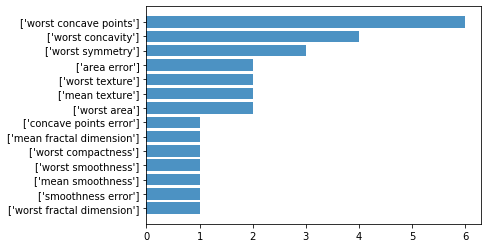

In [52]:
import matplotlib.pylab as plt
x, y = zip(*dic)
plt.barh(x, y, align='center', alpha=0.8)
plt.show()

## Question 4
implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **N_estimators**: The number of trees in the forest. 
2. **Max_features**: The number of random select features to consider when looking for the best split
3. **Bootstrap**: Whether bootstrap samples are used when building tree


https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

https://rstudio-pubs-static.s3.amazonaws.com/378052_30d987a09ea54b6db5aa1e82f5dce6bf.html

In [176]:
class RandomForest():
    def __init__(self, n_estimators, max_features, boostrap=True, criterion='gini', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.depth_record = []
        self.stack = Stack(self.depth_record)
        self.stack.push(1)
        self.forest = []
        self.n = 0
        self.total = 0
        return None

    # If bootstrap=False, then each tree is built on all training samples.
    # I set 35% data randomly choosed when bootstrap == True
    def data_bootstrap(self, data):
        return data.sample(frac=1.0, replace=True)

    # randomly select n features and choose the suitable feature from these n data
    def choose_feature(self,):
        feature_list = np.random.choice(feature_names, size=int(
            self.max_features), replace=False, p=None)
        return feature_list

    def questions(self, data, label):
        best_gain = 0  # keep track of the best information gain
        best_question = None  # keep train of the feature / value that produced it
        #current_uncertainty = gini(rows)
        features = self.choose_feature()

        for i in range(len(features)):
            col = data[[features[i]]]
            left, right, left_label, right_label, threshold = self.partition(
                data, list(col.columns), label)
            # Skip this split if it doesn't divide the dataset.
            if left.shape[0] == 0 or right.shape[0] == 0:
                continue
            # Calculate the information gain from this split
            p = float(left.shape[0]) / (left.shape[0] + right.shape[0])
            left_arr = np.array(left_label.iloc[:, 0])
            right_arr = np.array(right_label.iloc[:, 0])

            if self.criterion == 'gini':
                gain = gini(
                    np.array(label.iloc[:, 0])) - p * gini(left_arr) - (1 - p) * gini(right_arr)
            else:
                gain = entropy(np.array(
                    label.iloc[:, 0])) - p * entropy(left_arr) - (1 - p) * entropy(right_arr)

            if gain >= best_gain:
                best_gain, best_question = gain, list(col.columns)
        return best_gain, best_question

    def partition(self, data, question, label):
        true_rows, false_rows = [], []
        col = data[question]
        criteria = float(col.mean())
        for ind in range(len(col)):
            if float(col.iloc[ind]) >= criteria:
                true_rows.append(ind)
            else:
                false_rows.append(ind)
        left = data.iloc[true_rows, :]
        label_l = label.iloc[true_rows, :]
        right = data.iloc[false_rows, :]
        label_r = label.iloc[false_rows, :]
        return left, right, label_l, label_r, criteria

    def fit(self, X, y):
        gain, question = self.questions(X, y)
        n = self.stack.pop()
        if gain == 0 or n == self.max_depth:
            return Leaf(X, y)
        self.stack.push(n+1)
        self.stack.push(n+1)
        left, right, label_l, label_r, threshold = self.partition(
            X, question, y)
        left_branch = self.fit(left, label_l)
        right_branch = self.fit(right, label_r)
        return Decision_Node(question, left_branch, right_branch, threshold)

    def build_forest(self, X, y):
        for i in range(self.n_estimators):
            self.depth_record = []
            self.stack = Stack(self.depth_record)
            self.stack.push(1)
            if self.boostrap == True:
                data = self.data_bootstrap(X)
                index = np.array(data.index.tolist())
                label = y.iloc[index, :]
                self.forest.append(self.fit(data, label))
            else:
                self.forest.append(self.fit(X, y))
        return self.forest

    # input data row by row
    def prediction(self, tree, data, sequence):
        if isinstance(tree, Leaf):
            sequence.append(tree.target_class)
            return
        # partition the test data by question and criteria
        ans = self.partition_test(data, tree.question, tree.threshold)
        if ans == 'left':
            self.prediction(tree.true_branch, data, sequence)
        else:
            self.prediction(tree.false_branch, data, sequence)
        return

    def vote(self, forest, test):
        ans_list = []
        n = None
        for k in range(test.shape[0]):
            vote_list = []
            for i in range(len(forest)):
                self.prediction(forest[i], test.iloc[k:k+1, :], vote_list)
            n = np.argmax(np.bincount(vote_list))
            ans_list.append(int(n))
        return ans_list

    def partition_test(self, data, question, criteria):
        col = data[question]
        if float(np.array(col)) >= float(criteria):
            return 'left'
        else:
            return 'right'

In [173]:
def forest_accuracy(pre, test):
    test = np.array(test).flatten()
    pre = np.array(pre)
    count = 0
    n = len(pre)
    for i in range(n):
        if pre[i] == test[i]:
            count = count+1
    return float(count/n)

In [182]:
# Testing
try1 = RandomForest(n_estimators=3, max_features=5,
                    boostrap=True, criterion='gini', max_depth=3)
tree1 = try1.build_forest(x_train, y_train)
final = try1.vote(tree1, x_test)
forest_accuracy(final, y_test)

0.8741258741258742

### Question 4.1
Using Criterion=‘gini’, Max_depth=None, Max_features=sqrt(n_features), showing the accuracy score of test data by n_estimators=10 and n_estimators=100, respectively.


In [177]:
clf_10tree = RandomForest(
    n_estimators=10, max_features=np.sqrt(x_train.shape[1]))
tree10 = clf_10tree.build_forest(x_train, y_train)
final10 = clf_10tree.vote(tree10, x_test)
forest_accuracy(final10, y_test)

0.951048951048951

In [178]:
clf_100tree = RandomForest(
    n_estimators=100, max_features=np.sqrt(x_train.shape[1]))
tree100 = clf_100tree.build_forest(x_train, y_train)
final100 = clf_100tree.vote(tree100, x_test)
forest_accuracy(final100, y_test)

0.958041958041958

### Question 4.2
Using Criterion=‘gini’, Max_depth=None, N_estimators=10, showing the accuracy score of test data by Max_features=sqrt(n_features) and Max_features=n_features, respectively.


In [179]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(
    x_train.shape[1]))
random_tree = clf_random_features.build_forest(x_train, y_train)
final_random = clf_random_features.vote(random_tree, x_test)
forest_accuracy(final_random, y_test)

0.951048951048951

In [181]:
clf_all_features = RandomForest(
    n_estimators=10, max_features=x_train.shape[1])
random_all = clf_all_features.build_forest(x_train, y_train)
final_all = clf_all_features.vote(random_all, x_test)
forest_accuracy(final_all, y_test)

0.965034965034965

- Note: Use majority votes to get the final prediction, you may get slightly different results when re-building the random forest model

## Supplementary
If you have trouble to implement this homework, TA strongly recommend watching [this video](https://www.youtube.com/watch?v=LDRbO9a6XPU), which explains Decision Tree model clearly. But don't copy code from any resources, try to finish this homework by yourself! 